### Machine Learning for Data Quality Prediction
**Description**: Use a machine learning model to predict data quality issues.

**Steps**:
1. Create a mock dataset with features and label (quality issue/label: 0: good, 1: issue).
2. Train a machine learning model.
3. Evaluate the model performance.

### Classification Report ###
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3

### Confusion Matrix ###


/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


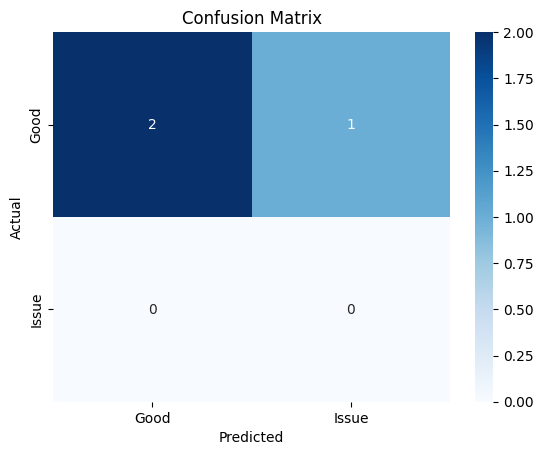

In [1]:
# write your code from here
# Step 0: Install dependencies (in terminal)
# pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create mock dataset
# Features: age, income, missing_values_count
# Label: 0 = good, 1 = quality issue
data = {
    "age": [25, 30, 150, None, 45, 28, 130, 50, 38, None],
    "income": [50000, 62000, 100000, 40000, None, 58000, 20000, 45000, 61000, None],
    "missing_values_count": [0, 0, 0, 1, 1, 0, 0, 0, 0, 2],
    "quality_issue": [0, 0, 1, 1, 1, 0, 1, 0, 0, 1]
}

df = pd.DataFrame(data)

# Simple imputation for missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['income'].fillna(df['income'].median(), inplace=True)

# Features and label
X = df[['age', 'income', 'missing_values_count']]
y = df['quality_issue']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. Evaluate model
y_pred = model.predict(X_test)

print("### Classification Report ###")
print(classification_report(y_test, y_pred))

print("### Confusion Matrix ###")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Good", "Issue"], yticklabels=["Good", "Issue"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
